## Final Project Submission

Please fill out:
* Student name: Catherine Gakii
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Diana Mongina 
* Blog post URL:


**Research Questions**
1. To understand which studios are producing the most successfull movies
2. To explore which genres are performing best at the box office.


**Dataset used:**


1:/content/bom.movie_gross.csv.gz

2:/content/im.db.zip table movie_ratings

3:./content/im.db.zip table movie_basic


**/content/bom.movie_gross.csv.gz** variables 

**title: **the title of the movie

**studio**: the studio that produced or distributed the movie

**domestic_gross:** the total domestic (US) box office gross earnings of the movie in US dollars

**foreign_gross:** the total foreign box office gross earnings of the movie in US dollars

**year**: the year the movie was released
______________________________________________________________________________________________________________

**/content/im.db: ** movie_rating dataset explained**

**tconst:** a unique identifier for each movie (same as in movie_basics)

**average_rating:** the average rating of the movie, based on user and critic reviews

**num_votes:** the number of votes/ratings the movie received

**distribution**: the distribution of ratings, e.g. the number of 1-star, 2-star, 3-star, etc. ratings

______________________________________________________________________________________________________________

**/content/im.db: ** movie_basic dataset explained**

**tconst:** a unique identifier for each movie

**title_type:** the type of title (e.g. movie, short, tvSeries)

**primary_title:** the primary title of the movie

**original_title:** the original title of the movie

**is_adult:** whether the movie is an adult movie (e.g. pornographic content)

**start_year:** the year the movie was released

**end_year:** the year the movie stopped running (if a TV series)

**runtime_minutes:** the runtime of the movie in minutes

**genres:** the genre(s) of the movie (e.g. Drama, Action, Comedy)

# **1. Load the dataset into the and read as CSV **

 1.1 Importing libraries









In [ ]:
# Importing necessary libaries 
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandas as pd
import zipfile

 1.2 Loading and reading the datasets 

In [ ]:
df_movie_gross = pd.read_csv('/content/bom.movie_gross.csv.gz')
print("The gross movie shape is =",df_movie_gross.shape)

The gross movie shape is = (3387, 5)


In [ ]:
# opening and reading the content of content/im.db.zip  dataset
#unzip the file

with zipfile.ZipFile('/content/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
# connect to the SQLite database
sql= sqlite3.connect('/content/im.db')

# querirng  the 'movie_basics' 
df_basic = pd.read_sql_query('SELECT * FROM movie_basics',sql)
# querirng  the 'movie_basics' 
df_rating = pd.read_sql_query('SELECT * FROM movie_ratings',sql)


# **2.0 Exploring the dataset**

In [ ]:
#1.0 Checking the shape of the datasets 
print("The gross movie shape is =",df_movie_gross.shape)
print()
print("The basic movie  shape is =",df_basic.shape)
print() 
print("The rating movie  shape is =",df_rating.shape)


The gross movie shape is = (3387, 5)

The basic movie  shape is = (146144, 6)

The rating movie  shape is = (73856, 3)


**Shape observation:** The three datasets have different number of rows and coluymns 

# **3.0 Checking the gross movie dataset**

In [ ]:
df_movie_gross.head(5) ###check the first 5 rows  of movie 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
df_movie_gross.tail(3) ###check the last 3 rows 

,title,studio,domestic_gross,foreign_gross,year
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


**Obseravation of values for the gross movie:** In the tail the values of the foreign_gross are missing

In [ ]:
df_movie_gross.info() ## getiing the summmary for the data including missing da

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
# Checking the % of value missing 
missing_per = df_movie_gross.isnull().mean() * 100
missing_per 

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

**Missing Value in the gross movie :** foreign_gross has ~40 % missing values worth to explore more the type of value missing

In [ ]:
df_movie_gross.describe() ##to get the sum stats for the numerical data 

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


**4.0 Data manipulation the  gross movie dataset**

In [ ]:
# create a copy of movie dataset

df_movie_gross1=df_movie_gross.copy()

In [ ]:
### dropping all the missing values 
df_movie_gross1=df_movie_gross1.dropna()
df_movie_gross1.isnull().sum(). any() # confirm is all missing have been dropped 

False

In [ ]:
##checking for duplicates 
df_movie_gross1.duplicated().sum() # no duplicates observed 

0

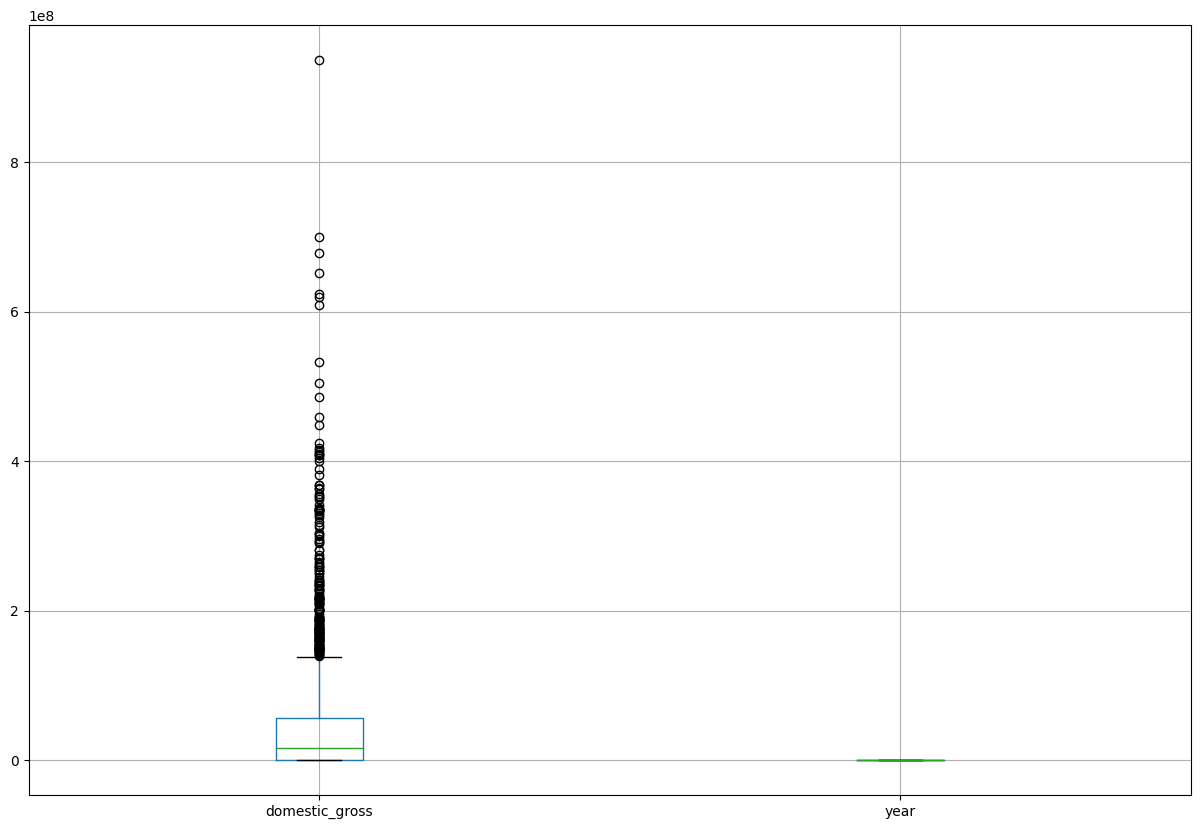

In [ ]:
# checking for outliers 
plt.figure(figsize=(15, 10))
df_movie_gross1.boxplot()
plt.show()


**Observation:** There is outlier in the domestic_gross though it is okay

**Research Questions 1**

1:To understand which studios are producing the most successfull movies

In [ ]:
# Calculate descriptive statistics of the domestic gross
#our dependent variable=domestic_gross
#our independent variable =studios 
domestic_gross = df_movie_gross1['domestic_gross']
print(domestic_gross.describe())

count    2.007000e+03
mean     4.701984e+07
std      8.162689e+07
min      4.000000e+02
25%      6.700000e+05
50%      1.670000e+07
75%      5.605000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64


**Observation:** The data looks okay with normal disribution

In [ ]:

# Check for missing values for the domestic gross
print(domestic_gross.isnull().sum()) ## no missing values since it was dropped

0


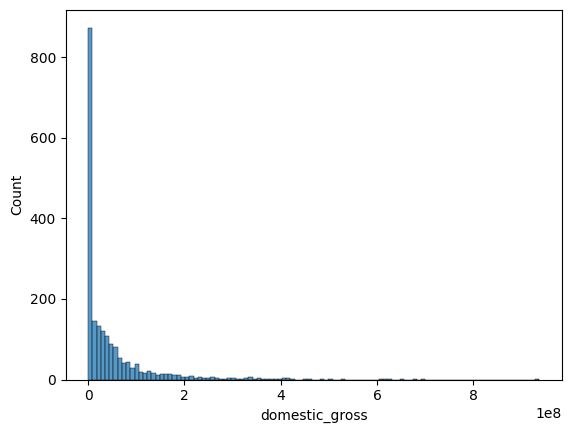

In [ ]:
# Visualize the distribution for the domestic gross

sns.histplot(domestic_gross)
plt.show()

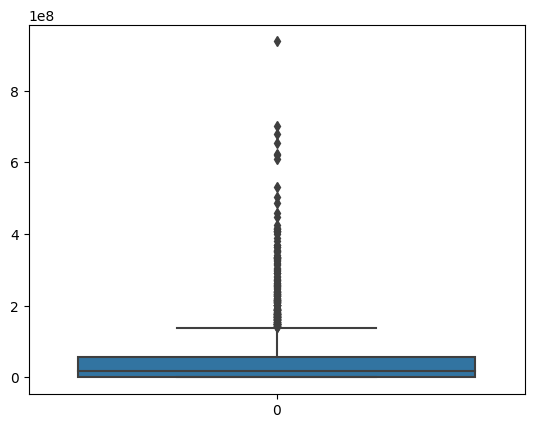

In [ ]:
# Check for outliers for the domestic gross
sns.boxplot(domestic_gross)
plt.show()


**observation :** There is one outlier in the domestic_gross though we will keep it 

In [ ]:
## find the 10 stuidos with the highest domestic_gross
## group by studio and the domestic_gross sum
studio_gross = df_movie_gross1.groupby('studio')['domestic_gross'].sum()

studio_gross = studio_gross.sort_values(ascending=False) ##sorting 
top_studios=studio_gross.head(10)
studio_gross.head(10) ## print the foirst 10 studios with the highest revenue 

studio
BV         1.839653e+10
Uni.       1.289204e+10
WB         1.212360e+10
Fox        1.092450e+10
Sony       8.459479e+09
Par.       7.580813e+09
LGF        3.991851e+09
WB (NL)    3.975100e+09
LG/S       1.965200e+09
P/DW       1.682900e+09
Name: domestic_gross, dtype: float64

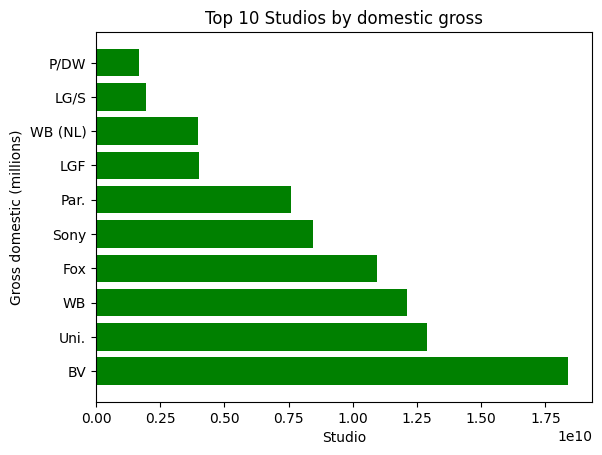

In [ ]:

## find the 10 stuidos with the highest domestic_gross
plt.barh(top_studios.index, top_studios.values,color="green")
plt.title('Top 10 Studios by domestic gross')
plt.xlabel('Studio')
plt.ylabel('Gross domestic (millions)')
plt.show()




<ipython-input-118-3bfbcc656ad6>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gross_revenue = df_movie_gross.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()


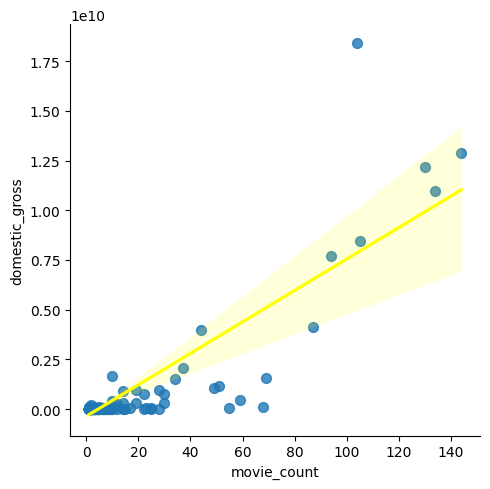

In [ ]:
#correlation between a studio's movie production and its gross revenue.
df_movie_counts = df_movie_gross1['studio'].value_counts().rename_axis('studio').reset_index(name='movie_count')

# Group the gross revenue by studio
df_gross_revenue = df_movie_gross.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

# Merge the movie counts and gross revenue DataFrames
df_studio = pd.merge(df_movie_counts, df_gross_revenue, on='studio')

# Create a scatter plot with a regression line
sns.lmplot(x='movie_count', y='domestic_gross', data=df_studio, scatter_kws={'s': 50}, line_kws={'color': 'yellow'})

**Conclusion:**

Based on the analysis, it can be concluded that the top studios producing the most successful movies in terms of gross revenue are Walt Disney, Warner Bros., and Universal Studios
The data also suggests that there is a positive correlation between a studio's movie production and its gross revenue.

These findings can help guide the decision-making process for the head of Microsoft's new movie studio.

 They may want to consider partnering with one of the top studios or emulating their successful strategies. Additionally, they could focus on producing a larger quantity of movies in order to increase the chances of generating higher gross revenue.

# **3.0 Checking the basic and rating dataset**

In [ ]:
df_basic.head(5) ###check the first 5 rows  basic movie 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
df_basic.tail(5) ###check the last 5 rows  basic movie 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


 **Observation**: Data variables are consistent from top to bottom for the basic movie dataset

In [ ]:
df_rating.head(5) ###check the first 5 rows  rating movie

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
df_rating.tail(5) ###check the last  5 rows  rating movie

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


**Observation:** Data variables are consistent from top to bottom for the rating movie dataset

***Conclusion of the two dataset: *** They have different variables and common movie_id hence they can be merged and perform data explolation 

# **4.Exploring IM Movies**  :Merged rating and basic movies 

In [ ]:
## merging the rating and the basic dataset
df_rating_basic = pd.merge(df_basic, df_rating)

In [ ]:
df_rating_basic.head() ##checking if the dataset merged 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [ ]:
df_rating_basic.head(5) ###check the first 5 rows  of movie 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [ ]:
df_rating_basic.tail() ##checking the last 5 rows

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


**Conclusion of merged dataset:** The columns, rowsa and values are constistent from top to bottom

In [ ]:
df_rating_basic.info() ## getiing the summmary for the data including missing da

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [ ]:
# Checking the % of value missing 
missing_per = df_rating_basic.isnull().mean() * 100
missing_per

movie_id            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

**Missing value observation:** The level of the missing is less than 10% we can replace the missing by the mean

# ***4.0 Data manipulation the megerd basic and rating dataset movie ***

In [ ]:
### fill the missing with means since the missing values are < 10%
df_rating_basic_filled = df_rating_basic.fillna(df_rating_basic.mean())

<ipython-input-148-0026d79961fc>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_rating_basic_filled = df_rating_basic.fillna(df_rating_basic.mean())


In [ ]:
df_rating_basic_filled.info() ### checking if all missing values have been filled 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [ ]:
##checking for duplicates 
df_rating_basic_filled.duplicated().sum() # no duplicates observed 
##no duplicates observed 

0

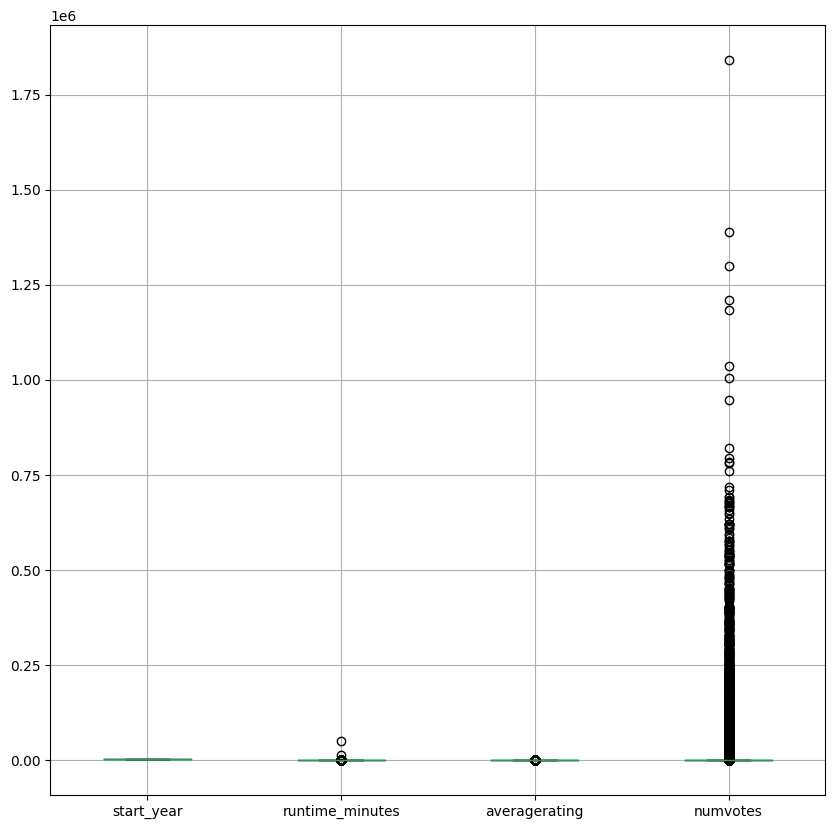

In [ ]:
# checking for outliers 
# Select numerical columns and remove rows with missing values
df_num = df_rating_basic_filled.select_dtypes(include=[float, int,float]).dropna()
plt.figure(figsize=(10, 10))
df_rating_basic_filled.boxplot()
plt.show()


**Observation:** There is outlier in the numvotes though it is okay

**Research Questions 2**

To explore which genres are performing best at the box office.

In [ ]:
# Calculate descriptive statistics of the averagerating
#our dependent variable=avearagerating
#our independent variable =genres 
averagerating = df_rating_basic_filled['averagerating']
print(averagerating.describe())

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64


**Observation:** The data looks okay with normal disribution

In [ ]:
# Check for missing values for the averagerating
print(averagerating.isnull().sum()) ## no missing values since it was dropped

0


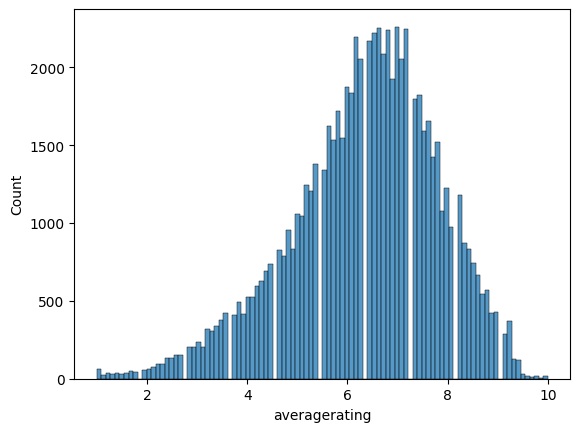

In [ ]:
# Visualize the distribution for the averagerating
sns.histplot(averagerating)
plt.show()

**Observation:** The data looks symetrical with no outliers 

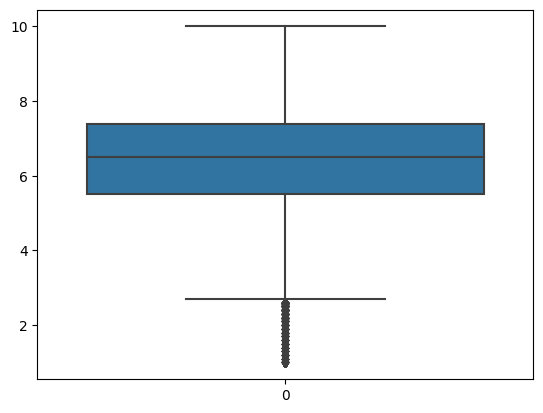

In [ ]:
# Check for outliers for the domestic gross
sns.boxplot(averagerating)
plt.show()


**Observation:** No outlier detected in the data

In [ ]:
## find the 10 genres  with the highest rating 
## group by genre and the average rating  sum
df_genre = df_rating_basic_filled.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
top_genres = df_genre.head(10)
top_genres ## print the foirst 10 studios with the highest rating

genres
Comedy,Documentary,Fantasy     9.4
Documentary,Family,Musical     9.3
History,Sport                  9.2
Music,Mystery                  9.0
Game-Show                      9.0
Drama,Fantasy,War              8.8
Documentary,News,Sport         8.8
Comedy,Drama,Reality-TV        8.8
Drama,Short                    8.8
Documentary,News,Reality-TV    8.8
Name: averagerating, dtype: float64

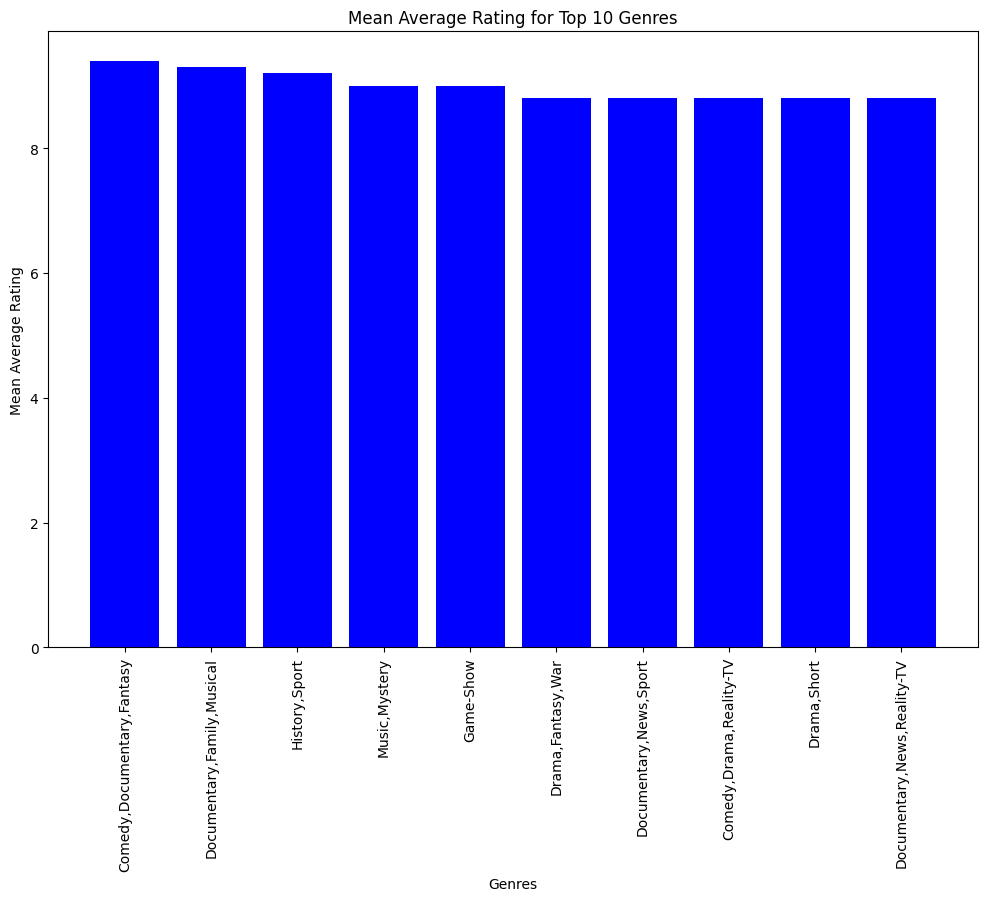

In [253]:
##create vizual of 10 top genres rating
plt.figure(figsize=(12,8))
plt.bar(top_genres.index, top_genres.values, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Mean Average Rating')
plt.title('Mean Average Rating for Top 10 Genres')
plt.show()


# Conclusion: 

Based on the analysis, we can see that the genres Comedy,Documentary,Fantasy  have the highest mean average rating of 9.4 . This suggests that movies in these genres tend to be more highly rated by viewers compared to movies in other genres. 

From the bar plot, we can see that there is a clear difference in the mean average rating between the top 10 genres and the other genres.

 This suggests that genre is an important factor to consider when producing movies, as it can have a significant impact on the viewer's perception of the movie. 


